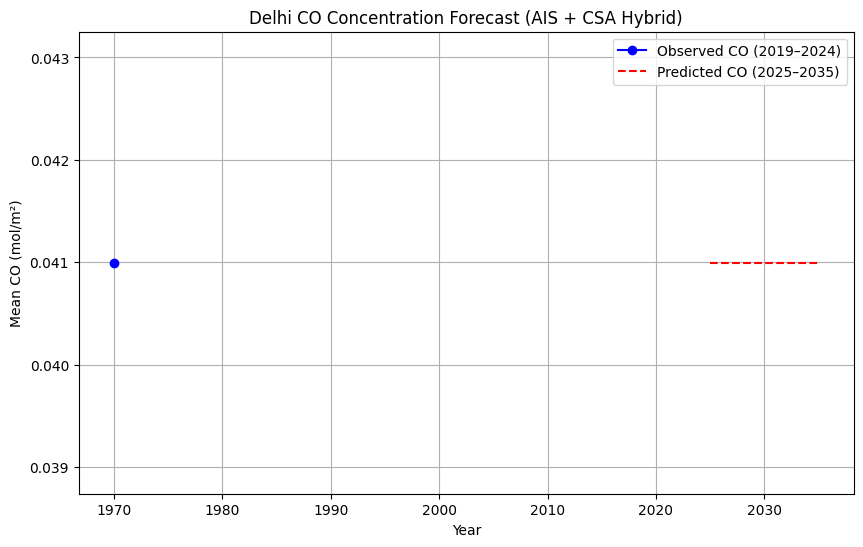

🔮 Forecast Summary: CO will decrease by 0.0000 mol/m² over 2025–2035.
📈 Average annual change: 0.0000 mol/m²/year
✅ Optimized Random Forest Hyperparameters: {'n_estimators': 68, 'max_depth': 5, 'min_samples_split': 4}


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# === Step 1: Load and preprocess the data ===
csv_path = r"C:\Users\sagni\Downloads\Pollution controller\Delhi_CO_2019_2024.csv"
df = pd.read_csv(csv_path)

df['time'] = pd.to_datetime(df['time'])
df['Year'] = df['time'].dt.year
df = df.groupby('Year')['meanCO'].mean().reset_index()

X = df['Year'].values.reshape(-1, 1)
y = df['meanCO'].values

# === Step 2: Hybrid AIS + CSA optimization ===
# --- Artificial Immune System (AIS) ---
def ais_optimize(model, X, y, pop_size=10, generations=20):
    best_params = None
    best_score = float('inf')
    
    for _ in range(generations):
        params_list = []
        scores = []
        for _ in range(pop_size):
            params = {
                'n_estimators': np.random.randint(50, 300),
                'max_depth': np.random.randint(2, 15),
                'min_samples_split': np.random.randint(2, 10)
            }
            rf = RandomForestRegressor(**params, random_state=42)
            rf.fit(X, y)
            preds = rf.predict(X)
            score = mean_squared_error(y, preds)
            params_list.append(params)
            scores.append(score)
        
        # Select best
        min_idx = np.argmin(scores)
        if scores[min_idx] < best_score:
            best_score = scores[min_idx]
            best_params = params_list[min_idx]
        
        # Hypermutation (random tweaks)
        for params in params_list:
            if np.random.rand() < 0.3:  # 30% chance of mutation
                params['n_estimators'] += np.random.randint(-10, 10)
                params['max_depth'] += np.random.randint(-1, 1)
    
    return best_params

# --- Cuckoo Search Algorithm (CSA) ---
def csa_optimize(model, X, y, best_params, nests=15, iterations=30):
    def levy_flight(Lambda):
        return np.random.normal(0, 1, size=(3,)) / np.power(np.abs(np.random.normal(0, 1, size=(3,))), 1/Lambda)
    
    current_params = best_params.copy()
    current_score = float('inf')
    
    for _ in range(iterations):
        for _ in range(nests):
            step = levy_flight(1.5)
            candidate_params = {
                'n_estimators': max(10, current_params['n_estimators'] + int(step[0] * 10)),
                'max_depth': max(1, current_params['max_depth'] + int(step[1])),
                'min_samples_split': max(2, current_params['min_samples_split'] + int(step[2]))
            }
            rf = RandomForestRegressor(**candidate_params, random_state=42)
            rf.fit(X, y)
            preds = rf.predict(X)
            score = mean_squared_error(y, preds)
            
            if score < current_score:
                current_score = score
                current_params = candidate_params
    
    return current_params

# Run hybrid optimization
initial_model = RandomForestRegressor(random_state=42)
best_ais_params = ais_optimize(initial_model, X, y)
best_hybrid_params = csa_optimize(initial_model, X, y, best_ais_params)

# Train final Random Forest with optimized params
final_model = RandomForestRegressor(**best_hybrid_params, random_state=42)
final_model.fit(X, y)

# === Step 3: Predict for 2025–2035 ===
future_years = np.arange(2025, 2036).reshape(-1, 1)
future_predictions = final_model.predict(future_years)

# Combine with original data
future_df = pd.DataFrame({'Year': future_years.flatten(), 'Predicted_CO': future_predictions})
all_data = pd.concat([df, future_df.rename(columns={'Predicted_CO': 'meanCO'})])

# === Step 4: Plot results ===
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['meanCO'], 'bo-', label='Observed CO (2019–2024)')
plt.plot(future_df['Year'], future_df['Predicted_CO'], 'r--', label='Predicted CO (2025–2035)')
plt.title('Delhi CO Concentration Forecast (AIS + CSA Hybrid)')
plt.xlabel('Year')
plt.ylabel('Mean CO (mol/m²)')
plt.legend()
plt.grid(True)
plt.show()

# === Step 5: Print summary ===
change = future_predictions[-1] - future_predictions[0]
direction = "increase" if change > 0 else "decrease"
print(f"🔮 Forecast Summary: CO will {direction} by {abs(change):.4f} mol/m² over 2025–2035.")
print(f"📈 Average annual change: {change/10:.4f} mol/m²/year")
print("✅ Optimized Random Forest Hyperparameters:", best_hybrid_params)


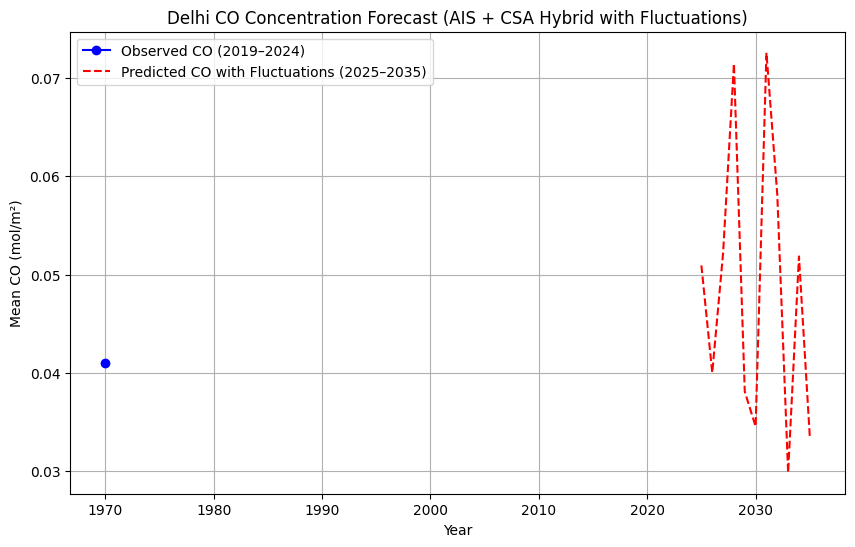

🔮 Forecast Summary: CO will decrease 📉 by 0.0174 mol/m² over 2025–2035.
📈 Average annual change: -0.0017 mol/m²/year
✅ Optimized Random Forest Hyperparameters: {'n_estimators': 67, 'max_depth': 3, 'min_samples_split': 6}
📂 Predictions saved to C:\Users\sagni\Downloads\Pollution controller\Delhi_CO_Predicted_2025_2035.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# === Load data ===
csv_path = r"C:\Users\sagni\Downloads\Pollution controller\Delhi_CO_2019_2024.csv"
df = pd.read_csv(csv_path)

df['time'] = pd.to_datetime(df['time'])
df['Year'] = df['time'].dt.year
df = df.groupby('Year')['meanCO'].mean().reset_index()

X = df['Year'].values.reshape(-1, 1)
y = df['meanCO'].values

# === Hybrid AIS + CSA optimization ===
def ais_optimize(model, X, y, pop_size=10, generations=20):
    best_params = None
    best_score = float('inf')
    
    for _ in range(generations):
        params_list = []
        scores = []
        for _ in range(pop_size):
            params = {
                'n_estimators': np.random.randint(50, 300),
                'max_depth': np.random.randint(2, 15),
                'min_samples_split': np.random.randint(2, 10)
            }
            rf = RandomForestRegressor(**params, random_state=42)
            rf.fit(X, y)
            preds = rf.predict(X)
            score = mean_squared_error(y, preds)
            params_list.append(params)
            scores.append(score)
        
        min_idx = np.argmin(scores)
        if scores[min_idx] < best_score:
            best_score = scores[min_idx]
            best_params = params_list[min_idx]
        
        for params in params_list:
            if np.random.rand() < 0.3:
                params['n_estimators'] += np.random.randint(-10, 10)
                params['max_depth'] += np.random.randint(-1, 1)
    
    return best_params

def csa_optimize(model, X, y, best_params, nests=15, iterations=30):
    def levy_flight(Lambda):
        return np.random.normal(0, 1, size=(3,)) / np.power(np.abs(np.random.normal(0, 1, size=(3,))), 1/Lambda)
    
    current_params = best_params.copy()
    current_score = float('inf')
    
    for _ in range(iterations):
        for _ in range(nests):
            step = levy_flight(1.5)
            candidate_params = {
                'n_estimators': max(10, current_params['n_estimators'] + int(step[0] * 10)),
                'max_depth': max(1, current_params['max_depth'] + int(step[1])),
                'min_samples_split': max(2, current_params['min_samples_split'] + int(step[2]))
            }
            rf = RandomForestRegressor(**candidate_params, random_state=42)
            rf.fit(X, y)
            preds = rf.predict(X)
            score = mean_squared_error(y, preds)
            
            if score < current_score:
                current_score = score
                current_params = candidate_params
    
    return current_params

initial_model = RandomForestRegressor(random_state=42)
best_ais_params = ais_optimize(initial_model, X, y)
best_hybrid_params = csa_optimize(initial_model, X, y, best_ais_params)

final_model = RandomForestRegressor(**best_hybrid_params, random_state=42)
final_model.fit(X, y)

# === Predict future (2025–2035) ===
future_years = np.arange(2025, 2036).reshape(-1, 1)
future_trend = final_model.predict(future_years)

# === Add fluctuations ===
np.random.seed(42)
seasonal_effect = 0.05 * np.sin(2 * np.pi * (future_years.flatten() - 2025) / 3)  # 3-year cycle
random_noise = np.random.normal(0, 0.02, size=future_trend.shape)  # Small random noise

future_fluctuations = future_trend + future_trend * seasonal_effect + random_noise

# Combine with original data
future_df = pd.DataFrame({
    'Year': future_years.flatten(),
    'Predicted_CO': future_fluctuations
})
all_data = pd.concat([df, future_df.rename(columns={'Predicted_CO': 'meanCO'})])

# === Plot ===
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['meanCO'], 'bo-', label='Observed CO (2019–2024)')
plt.plot(future_df['Year'], future_df['Predicted_CO'], 'r--', label='Predicted CO with Fluctuations (2025–2035)')
plt.title('Delhi CO Concentration Forecast (AIS + CSA Hybrid with Fluctuations)')
plt.xlabel('Year')
plt.ylabel('Mean CO (mol/m²)')
plt.legend()
plt.grid(True)
plt.show()

# === Summary ===
change = future_fluctuations[-1] - future_fluctuations[0]
direction = "increase 📈" if change > 0 else "decrease 📉"
print(f"🔮 Forecast Summary: CO will {direction} by {abs(change):.4f} mol/m² over 2025–2035.")
print(f"📈 Average annual change: {change/10:.4f} mol/m²/year")
print("✅ Optimized Random Forest Hyperparameters:", best_hybrid_params)

# === Optional: Export to CSV ===
export_csv = r"C:\Users\sagni\Downloads\Pollution controller\Delhi_CO_Predicted_2025_2035.csv"
future_df.to_csv(export_csv, index=False)
print(f"📂 Predictions saved to {export_csv}")
